# -----------------------------------------------------------------------------------
# Data Science Exploration Through Video Game Sales Data
#### By Remy Mezebish
# -----------------------------------------------------------------------------------

## Introduction
The data science life cycle is a process through which raw information is manipulated and analyzed with the intent of providing some insight or conclusion regarding the information. For our purposes, I will break the cycle into five phases: Data Collection, Data processing, Data Visualization and Exploratory Analysis, Machine Learning and Analysis, and Insight and Policy Decision. Through this guide, I will be describing each step as I walk through my own deployment of the data science life cycle in regards to a data set of video game sales statistics. My hope is that by the end you have a deeper understanding of this system and the ability to perform some of these operations yourself, so that you might utilize the vast quantities of data around us to formulate your own conclusions.

For example, the video game market has quickly become one of the largest sectors of the entertainment industry, so in this guide we will be trying to understand what factors are present in a well selling game.

Before we begin it should be noted that while not required, I will be carrying out my operations through the Python programming language, so some level of programming experience will be helpful in understanding this guide. A small amount of statistical knowledge will be helpful as well, but again this is not required.

For this project, we will need the following Python modules:
- Pandas: This provides us with the data structures that allow us to easily manipulate our data set.
- NumPy: This module allows us to utilize multi-dimensional arrays and matrices and various mathematical functions.
- Matplotlib: With this module we have a wide variety of tools to plot and visualize our data.
- statsmodels: This module gives a host of functions that we will use for the creation and analysis of our linear regression models.

In [1]:
# Importing all of the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Data Collection
The first step of the data science life cycle is a somewhat obvious one: you need to actually obtain the data you will be analyzing. Data exists in many forms around us. You may wish to collect raw data by creating surveys, performing experiments, or simply recording observations. Other times, the data we seek is already online, we just need to find a way to gather it for our own manipulation.

If this data resides in online web pages, like a web page of the top 100 songs of 2020, data scientists often employ a process known as 'web scraping' to pull information from web sources. This often involves converting a web page language like html into an organized text structure so that the data can be retrieved. In Python, the BeautifulSoup module is often used to parse html for this purpose.

Luckily for us, the data we will be using is already contained in a csv (comma separated values) file. This means that we can easily use a pandas function to produce a DataFrame from this file, without having to do any more complex web scraping. However, web scraping is a very valuable tool, and if you wish to learn more about web scraping in Python you should check out [this tutorial](https://realpython.com/python-web-scraping-practical-introduction/).

The following code snippet shows exactly how we can create a DataFrame from the data.world website where the data is originally from. A DataFrame is a Pandas data structure comprised of Numpy series'. Essentially, it is a table of rows and columns that allows us to easily manipulate our data.

In this step we create a DataFrame of about 16,700 games, each with column values corresponding to name, platform, year of release, and global sales among many others. The display function allows us to see a section of this DataFrame.

In [2]:
# Converting the data from CSV file to DataFrame.
df = pd.read_csv('https://query.data.world/s/hfrvssednec4u4hjxljf4idaaf5fyl')

# Setting DataFrame display format.
pd.set_option("display.max_rows", None, "display.max_columns", 100)

# Displaying the first 5 rows of the data.
display(df.head())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning:
Now that we have our data in a Python-manipulable form, we have to perform the second step of data collection: data cleaning. This is an important step as it ensures we have accurate and complete information. If there are discrepancies or errors in our data this can lead to errors within our analysis. As such, we have to ensure that the data within our columns is consistent and complete. 

For the most part, the data we have is well formed. Within each column there are no data type errors, and the strings are consistently spelled and formatted. This ensures we can easily perform operations and comparisons on our data. However, we do have the problem of incomplete data. There are several entries consisting of "NaN" which stands for Not A Number. This has happened because some values in the original csv were empty. Similarly, there are some rows of data that have "Unknown" in their Publisher column. We can't analyze values that don't exist, so we'll have to remedy these missing values somehow. There are several methods to do this, and there are even ways of generating missing data, but the simplest solution, and the one we'll be using, is to remove any rows that have missing data. The code snippet below performs this operation while storing the "Unknown" Publisher data in a separate DataFrame as I will make use of it later.

It should also be noted that in this step I am removing extraneous columns that are unnecessary for my analysis. This isn't a necessary step but having a more concise DataFrame makes it's manipulation a little easier and more organized. If you would like more information on data cleaning in general you can read up on the topic [here](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4) or find more information about python specific data cleaning [here](https://realpython.com/python-data-cleaning-numpy-pandas/).

In [3]:
# Removing all rows containing NaN values.
df = df.dropna().reset_index(drop=True)

# Storing a copy of the data rows where the Publisher value is 'Unknown'. This data will be used in later analysis.
spare_data = df[df.Publisher == 'Unknown'].reset_index()

# Removing any rows where the Publisher value is 'Unknown' from the main DataFrame.
df = df[df.Publisher != 'Unknown'].reset_index()

# Dropping extraneous columns.
df = df.drop(['index','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count','User_Score','User_Count','Rating'], axis=1)

# Displaying the first 5 rows of the newly cleaned data.
display(df.head())

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,Nintendo
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,Nintendo
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,Nintendo
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,Nintendo
4,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,Nintendo


## Data Processing
With our data properly cleaned, we can begin to mold our data into a form that will be more useful for our analysis. This step is known as data processing and involves the use of mathematical operations to transform the data in some way. This may mean aggregating data into a summary form, like counting the number of entries corresponding to a certain value, performing statistical operations like calculating standard deviation, or manipulating your data through matrix operations.

What needs to be done at this step relies entirely on what you hope to gain through your analysis. In order to visualize your data in a certain way, you may need your data in a form that makes that visualization possible. This is data processing. For us, because I will be using linear regression to fit the data, keeping the data in it's original form suits my intended use. However, I would like to get a better understanding of the most often occurring features in these games, so in parts I will be sorting the games by columns, and then counting the occurring values within those values. This will allow us to see, for example, how many PS2 games there are in the data set, or how many action games there are. The code snippet below performs this operation for four of our columns: Platform, Genre, Publisher, and Developer. 

In [4]:
# This section of code produces 4 separate DataFrames, with each DataFrame storing the number of video game titles corresponding
# to a certain value. For example, the 'Platform_counts' DataFrame stores the number of titles produced for each platform.

# The platform values are counted and a new DataFrame is produced from this information.
platform_counts = pd.DataFrame(df['Platform'].value_counts()).reset_index()
# The columns of the new DataFrame are renamed to match their new values.
platform_counts = platform_counts.rename(columns={'index':'Platform','Platform':'Count'})

genre_counts = pd.DataFrame(df['Genre'].value_counts()).reset_index()
genre_counts = genre_counts.rename(columns={'index':'Genre','Genre':'Count'})

publisher_counts = pd.DataFrame(df['Publisher'].value_counts()).reset_index()
publisher_counts = publisher_counts.rename(columns={'index':'Publisher','Publisher':'Count'}).iloc[:20,:]

dev_counts = pd.DataFrame(df['Developer'].value_counts()).reset_index()
dev_counts = dev_counts.rename(columns={'index':'Developer','Developer':'Count'}).iloc[:20,:]

## Data Visualization and Exploratory Analysis
Data visualization is the creation of graphical representations of data. This is a vital step as it provides a way to more easily consume the data in front of you. Staring a data table is often not helpful for understanding the data in question. And this is where the exploratory analysis portion comes in. Not only do we want to simply see the data in interesting ways, we also visualize the data in the hopes of seeing the trends and relationships present within the data.

By doing this, we can begin to formulate ideas and questions about the data. Does this variable relate to this other one? Why are there more action games than any other genre? Questions of this type can be asked when data is visualized in the proper way. These questions will be the stepping stones of our analysis that will hopefully lead us to a conclusion.

For us, I will begin this step by creating four plots that show the counted metrics we found in the data processing step.

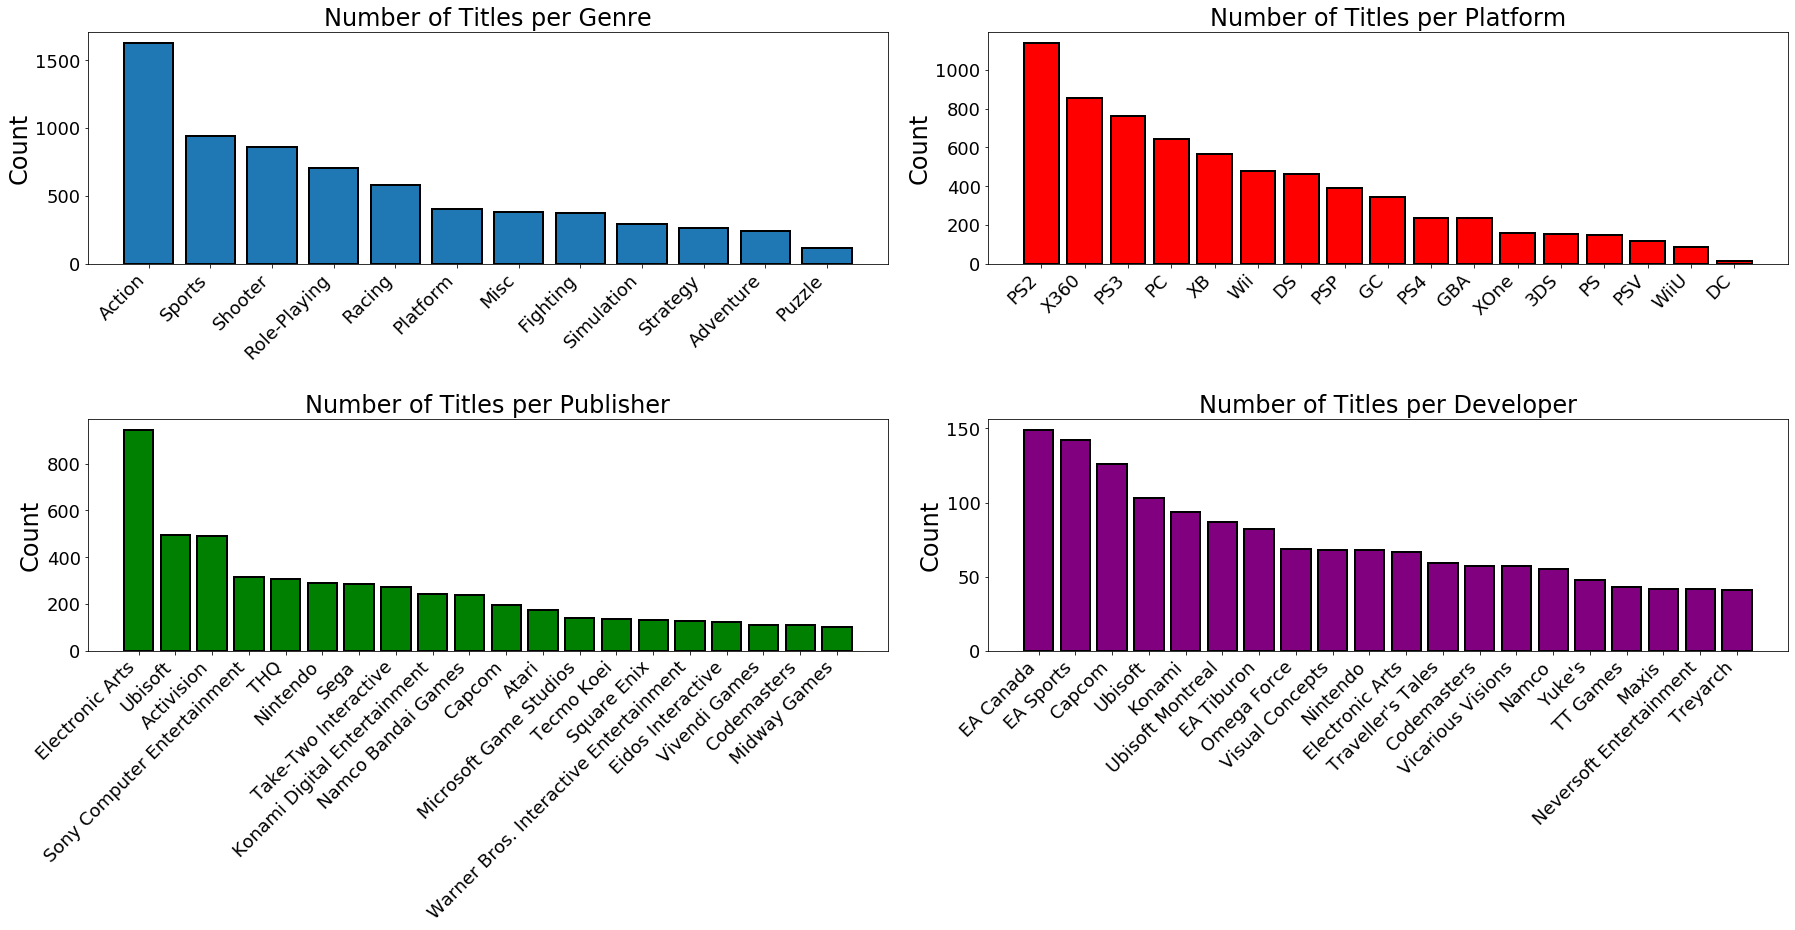

In [5]:
# This section of code produces 4 subplots to visualize the metric counts produced above.

# Setting the base font for all subplots.
font = {'size' : 18}
matplotlib.rc('font', **font)

# Creating 4 subplots in a 2x2 grid, of size (25,10).
fig, ax = plt.subplots(2, 2, figsize=(25,10))

# Setting the current axis to the top left subplot.
plt.sca(ax[0][0])
# Rotating the x-tick labels so they can be more easily viewed.
plt.xticks(rotation=45, ha="right")
# Setting a title for the subplot.
ax[0][0].set_title('Number of Titles per Genre', fontsize=24)
# Setting a y-axis label for the subplot.
ax[0][0].set_ylabel('Count', fontsize=24)

# The above steps are repeated below to format the 3 other subplots.

plt.sca(ax[0][1])
plt.xticks(rotation=45, ha="right")
ax[0][1].set_title('Number of Titles per Platform', fontsize=24)
ax[0][1].set_ylabel('Count', fontsize=24)

plt.sca(ax[1][0])
plt.xticks(rotation=45, ha="right")
ax[1][0].set_title('Number of Titles per Publisher', fontsize=24)
ax[1][0].set_ylabel('Count', fontsize=24)

plt.sca(ax[1][1])
plt.xticks(rotation=45, ha="right")
ax[1][1].set_title('Number of Titles per Developer', fontsize=24)
ax[1][1].set_ylabel('Count', fontsize=24)

# Setting the subplots to a tight layout with custom padding to make the figure more aesthetically pleasing.
fig.tight_layout(pad=1.0, w_pad=2.0, h_pad=5.0)

# Making a bar plot in each of the subplots.
ax[0][0].bar(genre_counts.Genre, genre_counts.Count, edgecolor='black', linewidth=2)
ax[0][1].bar(platform_counts.Platform, platform_counts.Count, color='red', edgecolor='black', linewidth=2)
ax[1][0].bar(publisher_counts.Publisher, publisher_counts.Count, color='green', edgecolor='black', linewidth=2)
ax[1][1].bar(dev_counts.Developer, dev_counts.Count, color='purple', edgecolor='black', linewidth=2)
    
# Displaying the figure.    
plt.show()

From this we can see exactly what types of games are most common. The action genre is most common, the PS2 is the most common platform games are released for, Electronic Arts is the most often occurring publisher, and EA Canada is the most common developer.

These metrics have their own uses, but if we hope to gain a better understanding what best predicts if a game will sell well we'll have to dig a bit deeper. With that in mind I wanted to see if either of the two other continuous variables at our disposal, critic score and year of release, have a direct relationship with global sales. To do this I made a scatter plot for each of these variables against global sales, and then plotted a line of best fit in each one to see if there is any trend.

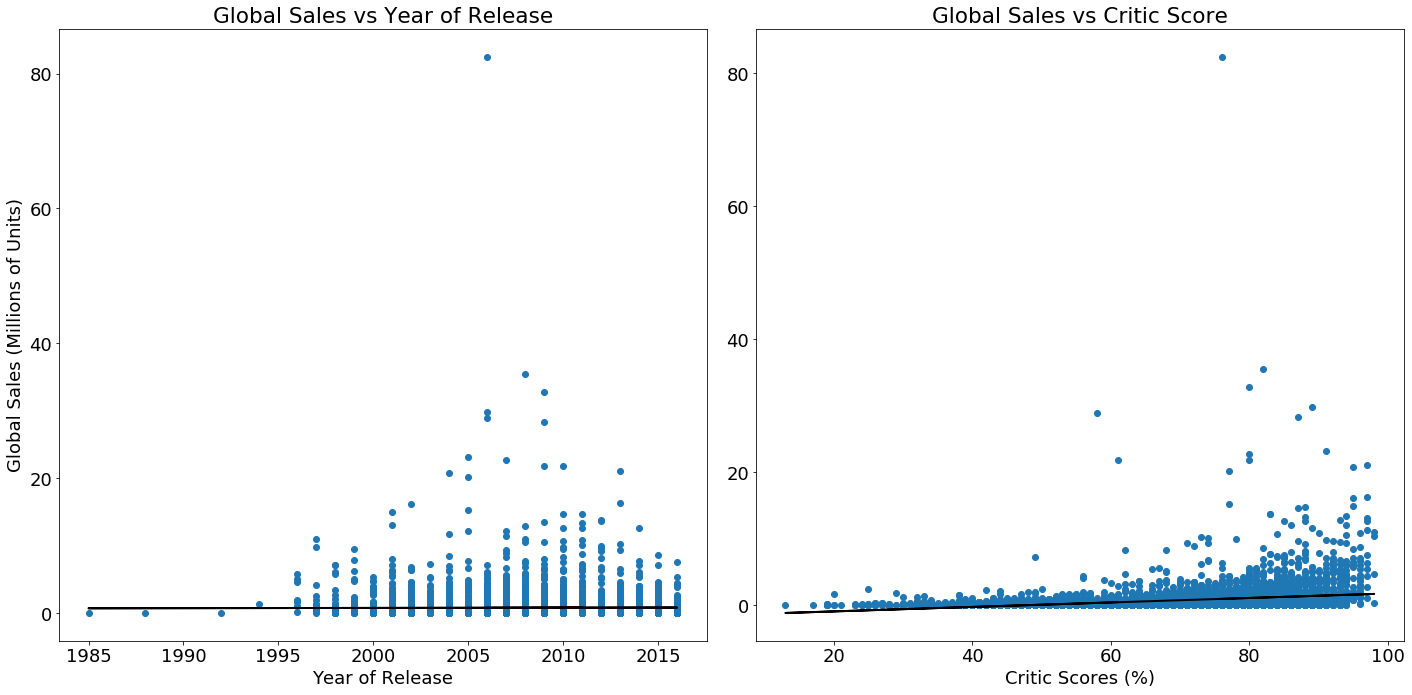

In [6]:
# Producing 2 subplots side by side horizontally.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# Creating a scatter plot of year of release vs global sales in the left subplot.
ax1.scatter(df.Year_of_Release, df.Global_Sales)
# Calculating the slope and intercept for a line of best fit for the left subplot.
m, b = np.polyfit(df.Year_of_Release, df.Global_Sales, 1)
# Plotting the line of best fit in the left subplot.
ax1.plot(df.Year_of_Release, m*(df.Year_of_Release)+b,color='black',linewidth=2)
# Setting the left subplot title, x-axis label, and y-axis label.
ax1.set_title('Global Sales vs Year of Release')
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Global Sales (Millions of Units)')

# The above steps are repeated to plot the critic scores vs global sales along with a line of best fit in the right subplot.
ax2.scatter(df.Critic_Score, df.Global_Sales)
m, b = np.polyfit(df.Critic_Score, df.Global_Sales, 1)
ax2.plot(df.Critic_Score, m*(df.Critic_Score)+b,color='black',linewidth=2)
ax2.set_title('Global Sales vs Critic Score')
ax2.set_xlabel('Critic Scores (%)')

# Setting the 2 subplots to have a tight layout.
fig.tight_layout()

# Displaying the figure.
plt.show()

From the slope of these lines we can see if there is a relationship between the variables. On the plot of global sales vs year of release we see that the line has a very flat slope. This indicates no relationship between the variables (one variable increasing has no effect on the other variable). In the plot of global sales vs critic score however, we see a very slightly positive slope. This shows a very weak positive relationship between global sales and critic score (as one increases so does the other one). Had either of the slopes been negative this would mean a negative relationship between the variables (as one increases the other would decrease).

Relationships are important because if variable x effects another variable, y, we can use variable x to predict y to some extent. While their is a relationship between global sales and critic score it is quite weak, so it does not give me good confidence that we can use critic scores alone to predict global sales.

## Machine Learning and Analysis
Machine learning in data science employs your computers ability to quickly perform algorithms on data to learn and predict previously unknown data values. In essence, we are applying algorithms to identify the patterns within our data to apply those patterns to data we don't yet know. There are many different types of machine learning methods, but we will be employing regression. To learn more about machine learning's other methods you can read [this article](https://towardsdatascience.com/10-machine-learning-methods-that-every-data-scientist-should-know-3cc96e0eeee9).

Regression is a process by which we can estimate the relationship between independent variables and a dependent one. We can these regression models to predict values for further data points. In this guide we will be using Ordinary Least Squares as a method for computing regression models. We will then analyze the quality of these models to determine if any of the accurately predict the global sales variable.

Ordinary Least Squares estimates the paramaters of a regression model by minimizing the sum of the squared residuals. A residual in this case is defined as the difference between the observed value and the value predicted by the regression value. Smaller residual values mean the model is more accurately predicting the observed value you are modeling. A deeper exploration of Ordinary Least Squares can be found [here](https://www.statisticshowto.com/least-squares-regression-line/)

We have the ability to easily create OLS regression models thanks to the statsmodels module. The code snippet below shows an example of how we use this model to create the null model for global sales. The null model is used to predict the response variable (in our case global sales) as the result of no other variables. We will create other models, but this illustrates how we go about doing so for the null formula 'Global_Sales ~ 1'.

This code also prints a summary of the model. Under the 'coef' column we can see the regression parameters that actually make up the model's regression equation. I also suggest taking notice of the AIC value and the P-values (marked in the column P>|t|), as we will use these values to compare our models.

AIC stands for Akaike Information Criterion. This value provides an estimator for relative quality of model by estimating the amount of information lost by a model. Less information lost = a better model, so we will be comparing models using this value.

The P-values on the other hand provides us with a confidence level that we can reject the null hypothesis of no relationship. With P-value of .05 there is a 5% chance that there is no relationship between the two variables for which the P-value is calculated. Because we do hope for relationships between our model parameters and the response variable (global sales) we are hoping for P-values less than .05. This indicates with a high degree of certainty that the model parameters do have a relationship with global sales.

I will also be comparing the residuals of models to determine which model more often predicts a value closer to the observed value, but I will explain this further later.

In [7]:
# The model_dict stores model formulas and AIC values as a key-value pair.
model_dict = {}

# f is used to temporarily store model formulas as strings. The first model produced is the null model.
f = 'Global_Sales ~ 1'
# Using the ols function to produce a model from the formula, f.
model = smf.ols(formula=f, data=df)
# Fitthing the model to the data.
result1 = model.fit()
# Adding the f and AIC value key value pair to the model_dict.
model_dict[f] = result1.aic

# Printing the summary statistics of this model.
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                nan
Time:                        18:49:26   Log-Likelihood:                -14249.
No. Observations:                6801   AIC:                         2.850e+04
Df Residuals:                    6800   BIC:                         2.851e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7795      0.024     32.689      0.0

Now that we know how to make OLS models we will repeat this step to create 12 more models. These models will be constructed to predict global sales from the other variables and the interaction between these variables. Then we can compare the models to determine which most accurately fits the data and could predict other global sales values.

By the end we will have created models from the following formulas:
- Global_Sales ~ 1 <----- Null model.
    
- Global_Sales ~ Critic_Score <----- Global sales in response to critic score.
    
- Global_Sales ~ C(Genre) <----- Global sales in response to genre. Note that the 'C()' indicates that genre is a categorical                                    variable.
- Global_Sales ~ C(Publisher)
    
- Global_Sales ~ C(Platform)
    
- Global_Sales ~ C(Developer)
    
- Global_Sales ~ Year_of_Release
    
- Global_Sales ~ Critic_Score : C(Genre) <----- Global sales in response to an interaction between critic score and genre.
    
- Global_Sales ~ Critic_Score : C(Platform)
    
- Global_Sales ~ Critic_Score : Year_of_Release
    
- Global_Sales ~ C(Platform) : C(Genre)
    
- Global_Sales ~ C(Platform) : Year_of_Release
    
- Global_Sales ~ Year_of_Release : C(Genre)


In [8]:
# This section of code performs the same operations as above to produce 12 more linear regression models from different formulas.

# This model predicts Global_Sales as a result of Critic_Score
f = 'Global_Sales ~ Critic_Score'
model = smf.ols(formula='Global_Sales ~ Critic_Score', data=df)
result2 = model.fit()
model_dict[f] = result2.aic

# This model predicts Global_Sales as a result of Genre.
f = 'Global_Sales ~ C(Genre)'
model = smf.ols(formula=f, data=df)
result3 = model.fit()
model_dict[f] = result3.aic

# This model predicts Global_Sales as a result of Publisher.
f = 'Global_Sales ~ C(Publisher)'
model = smf.ols(formula=f, data=df)
result4 = model.fit()
model_dict[f] = result4.aic

# This model predicts Global_Sales as a result of Platform.
f = 'Global_Sales ~ C(Platform)'
model = smf.ols(formula=f, data=df)
result5= model.fit()
model_dict[f] = result5.aic

# This model predicts Global_Sales as a result of Developer.
f = 'Global_Sales ~ C(Developer)'
model = smf.ols(formula=f, data=df)
result6 = model.fit()
model_dict[f] = result6.aic

# This model predicts Global_Sales as a result of Year_of_Release.
f = 'Global_Sales ~ Year_of_Release'
model = smf.ols(formula=f, data=df)
result7 = model.fit()
model_dict[f] = result7.aic

# This model predicts Global_Sales as the result of an interaction between Critic_Score and Genre.
f = 'Global_Sales ~ Critic_Score : C(Genre)'
model = smf.ols(formula=f, data=df)
result8 = model.fit()
model_dict[f] = result8.aic

# This model predicts Global_Sales as the result of an interaction between Critic_Score and Platform.
f = 'Global_Sales ~ Critic_Score : C(Platform)'
model = smf.ols(formula=f, data=df)
result9 = model.fit()
model_dict[f] = result9.aic

# This model predicts Global_Sales as the result of an interaction between Critic_Score and Year_of_Release.
f = 'Global_Sales ~ Critic_Score : Year_of_Release'
model = smf.ols(formula=f, data=df)
result10 = model.fit()
model_dict[f] = result10.aic

# This model predicts Global_Sales as the result of an interaction between Platform and Genre.
f = 'Global_Sales ~ C(Platform) : C(Genre)'
model = smf.ols(formula=f, data=df)
result11 = model.fit()
model_dict[f] = result11.aic

# This model predicts Global_Sales as the result of an interaction between Platform and Year_of_Release.
f = 'Global_Sales ~ C(Platform) : Year_of_Release'
model = smf.ols(formula=f, data=df)
result12 = model.fit()
model_dict[f] = result12.aic

# This model predicts Global_Sales as the result of an interaction between Year_of_Release and Genre
f = 'Global_Sales ~ Year_of_Release : C(Genre)'
model = smf.ols(formula=f, data=df)
result13 = model.fit()
model_dict[f] = result13.aic

With our models in hand, I will select the model with the lowest AIC value as the "good" model and the one with the highest AIC as the "bad" model. Then I will compare them in other ways to determine if the "good" model is actually better. If that is the case then we can know AIC is an effective metric for comparing model quality. 

Note: Good and Bad are parenthesized here because while we can use these metrics to compare our models with each other, they do not really speak much to the accuracy of the model, so the "good" model may not actually be very good at predicting the observed values.

In [9]:
# Pulling the formula corresponding to the lowest AIC value from model_dict
good = min(model_dict, key=model_dict.get)

# Pulling the formula corresponding to the highest AIC value from model_dict
bad = max(model_dict, key=model_dict.get)

# Displaying the hypothetically best and worst prediction formulas
print('Formula for "good" model: ' + good)
print('Formula for "bad" model: ' + bad)

Formula for "good" model: Global_Sales ~ Critic_Score : C(Platform)
Formula for "bad" model: Global_Sales ~ Year_of_Release


So it seems that the best model (according to AIC) is the one that predicts global sales in response to an interaction between critic score and platform, while the worst model is the one that predicts global sales in response to year of release.

Now I will display the summary statistics for each model to analyze their respective P-values.

In [10]:
# Displaying the summary statistics from the models corresponding to the best and worst formulas. Best is displayed first.
print(result9.summary())
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     45.43
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          1.26e-144
Time:                        18:49:28   Log-Likelihood:                -13883.
No. Observations:                6801   AIC:                         2.780e+04
Df Residuals:                    6783   BIC:                         2.792e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

From the summary statistics we can see that the P-values corresponding to the good model parameters are all 0, while the bad model P-values are both about .5. This indicates that we can reject the null hypothesis of no relationship within the good model to a high degree of certainty but we cannot do the same for the bad model. This confirms that the good model is better.

However, for even more confirmation I would like to compare the residuals of each model. To do this I will find the predicted global sales values from each model, and then calculate their respective residuals by subtracting the predicted values from the observed global sales values. I will also take the absolute value of these residuals, that way I can directly compare a residual for one data entry from each model, and the model which produced the smaller residual will get a point. When all of the residuals are compared and the points are tallied the model with the higher score will indicate which model more accurately predicted the observed values.

I also made plots to display the absolute values of the residuals compared to global sales in order to visually compare them, but the shear quantity of points and the wide range on which they fall made this less fruitful than comparing these values numerically.

In [11]:
# This section of code adds a predicted value and residual value column, for both the good and bad model (4 columns in total),
# to the DataFrame df.

# Adding the predicted value column from the good model.
df['Good_Predicted'] = result9.predict(df)
# Creating the good model residual value column by subtracting the good predicted values from the actual Global_Sales values.
df['Good_Residual'] = df['Global_Sales'].sub(df['Good_Predicted'], axis=0)
# Taking the absolute value of the residuals. This way a smaller value = a better residual.
df['Good_Residual'] = df['Good_Residual'].abs()

# Performing the above operations to produce the bad predicted and residual values.
df['Bad_Predicted'] = result7.predict(df)
df['Bad_Residual'] = df['Global_Sales'].sub(df['Bad_Predicted'], axis=0)
df['Bad_Residual'] = df['Bad_Residual'].abs()

# Displaying the head of the modified DataFrame.
display(df.head())

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Developer,Good_Predicted,Good_Residual,Bad_Predicted,Bad_Residual
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,Nintendo,2.000808,80.529192,0.774558,81.755442
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,Nintendo,2.305490,33.214510,0.781511,34.738489
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,Nintendo,2.203930,30.566070,0.784988,31.985012
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,Nintendo,1.729868,28.070132,0.774558,29.025442
4,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,Nintendo,1.086762,27.833238,0.774558,28.145442


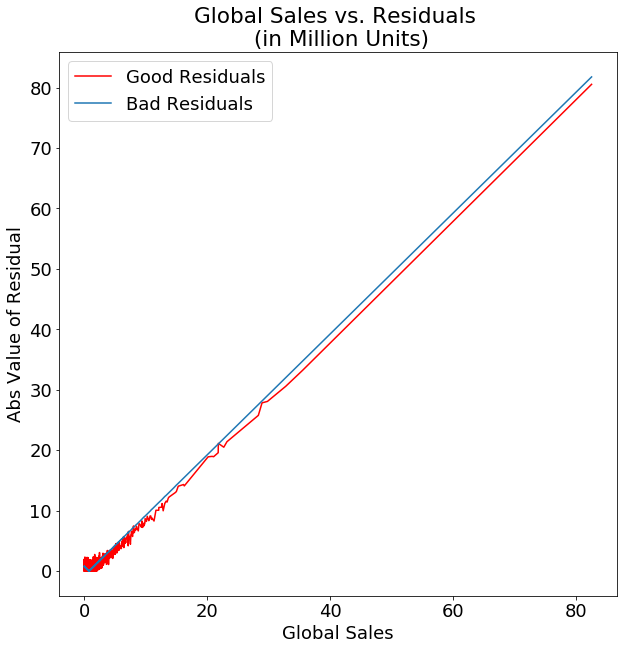

In [12]:
# This section of code displays a line graph of Global_Sales vs residuals of both the good and bad model

# Creating a figure of size (10,10).
plt.figure(figsize=(10,10))

# Plotting line for Good_Residual vs Global_Sales.
line1 = plt.plot(df.Global_Sales, df.Good_Residual, color='red', label='Good Residuals')

# Plotting line for Bad_Residual vs Global_Sales.
line2 = plt.plot(df.Global_Sales, df.Bad_Residual, label='Bad Residuals')

# Setting x-axis label, y-axis label, title, and legend.
plt.xlabel('Global Sales')
plt.ylabel('Abs Value of Residual')
plt.title("Global Sales vs. Residuals \n (in Million Units)")
ax = plt.gca()
ax.legend()

# Displaying plot.
plt.show()

In [13]:
# This section of code counts the number of times either model had a smaller abs(residual) than the other. A smaller
# abs(residual) indicates that that model more accurately predicted the Global_Sales value. The model with the higher
# "residual score" is the better model.

# g_resid_score stores the number of data points more closely predicted by the good model.
g_resid_score = 0
# b_resid_score stores the number of data points more closely predicted by the bad model.
b_resid_score = 0

# Iterating through every data entry in df.
for i in df.index:
    # Pulling the residual scores from the ith row in df.
    g_resid = df.iloc[i, 9]
    b_resid = df.iloc[i, 11]
    # if g_resid is smaller than b_resid then it more closely predicts the true Global_Sales value, so the good model gets a point.
    if g_resid < b_resid:
        g_resid_score += 1
    # Otherwise, the bad model gets a point.
    else:
        b_resid_score += 1
# Displaying the score for each model.
print('Number of points more closely predicted by the "good" model: {}'.format(g_resid_score))
print('Number of points more closely predicted by the "bad" model: {}'.format(b_resid_score))

Number of points more closely predicted by the "good" model: 3863
Number of points more closely predicted by the "bad" model: 2938


Again, this metric shows that the good model more accurately predicted the observed values more often than the bad model. This reconfirms that the good model is higher quality than the bad one.

For one last bit of affirmation, I will repeat this process using data that we initially removed from the data set because their publisher value was unknown. Because neither of the models utilize publisher, we can use these problems to predict the global sales for this spare data without problem. Then we can calculate and compare the absolute values of the residuals to compare them and see which model more accurately predicted the observed values.

In [14]:
# This section of code adds a predicted value and residual value column, for both the good and bad model (4 columns in total),
# to the DataFrame spare_data, which stores the "Unknown" Publisher data from the data cleaning step.

spare_data = spare_data.drop(['index','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1)

# Adding the predicted value column from the good model.
spare_data['Good_Predicted'] = result9.predict(spare_data)
# Creating the good model residual value column by subtracting the good predicted values from the actual Global_Sales values.
spare_data['Good_Residual'] = spare_data['Global_Sales'].sub(spare_data['Good_Predicted'], axis=0)
# Taking the absolute value of the residuals. This way a smaller value = a better residual.
spare_data['Good_Residual'] = spare_data['Good_Residual'].abs()

# Performing the above operations to produce the bad predicted and residual values.
spare_data['Bad_Predicted'] = result7.predict(spare_data)
spare_data['Bad_Residual'] = spare_data['Global_Sales'].sub(spare_data['Bad_Predicted'], axis=0)
spare_data['Bad_Residual'] = spare_data['Bad_Residual'].abs()

# Displaying the head of the modified DataFrame.
display(spare_data.head())

,Name,Platform,Year_of_Release,Global_Sales,Critic_Score,Good_Predicted,Good_Residual,Bad_Predicted,Bad_Residual
0,Teenage Mutant Ninja Turtles,GBA,2003.0,0.93,71.0,0.521489,0.408511,0.764127,0.165873
1,Blitz: The League,PS2,2005.0,0.89,76.0,1.092199,0.202199,0.771081,0.118919
2,RIFT,PC,2011.0,0.67,84.0,0.485387,0.184613,0.791942,0.121942
3,Two Worlds II,X360,2011.0,0.54,67.0,0.931196,0.391196,0.791942,0.251942
4,Two Worlds II,PS3,2011.0,0.46,70.0,1.012219,0.552219,0.791942,0.331942


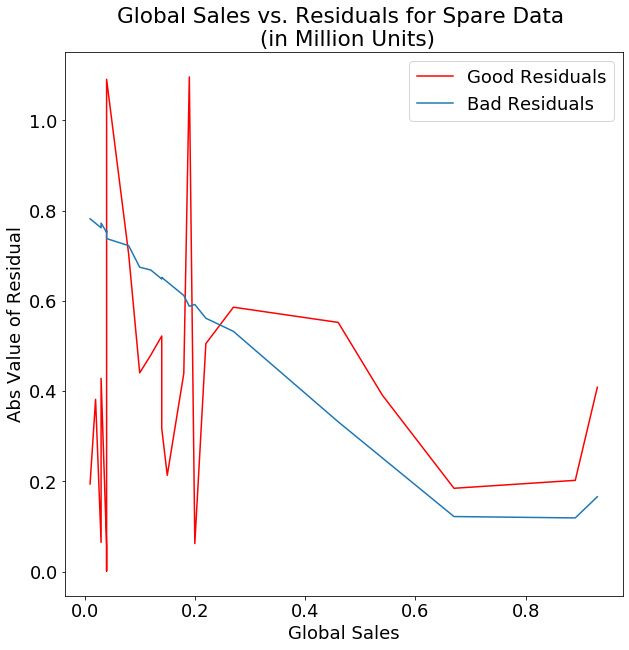

In [15]:
# This section of code displays a line graph of Global_Sales vs residuals of both the good and bad model from the 
# spare data.

# Creating a figure of size (10,10).
plt.figure(figsize=(10,10))

# Plotting line for Good_Residual vs Global_Sales.
plt.plot(spare_data.Global_Sales, spare_data.Good_Residual, color='red', label='Good Residuals')

# Plotting line for Bad_Residual vs Global_Sales.
plt.plot(spare_data.Global_Sales, spare_data.Bad_Residual, label='Bad Residuals')

# Setting x-axis label, y-axis label, title, and legend.
plt.xlabel('Global Sales')
plt.ylabel('Abs Value of Residual')
plt.title("Global Sales vs. Residuals for Spare Data \n (in Million Units)")
ax = plt.gca()
ax.legend()

# Displaying plot
plt.show()

This plot is more effective at displaying the residual values because there are fewer points. Here we can see that the red line, corresponding to the good model residuals, is often less than the blue line. From this we can visually see that good model residuals are smaller than the bad model residuals more often.

In [16]:
# This section of code performs the same residual score as above, however this time it is used to calculate the residual scores
# for the spare_data.

# g_resid_score stores the number of data points more closely predicted by the good model.
g_resid_score = 0
# b_resid_score stores the number of data points more closely predicted by the bad model.
b_resid_score = 0

# Iterating through every data entry in spare_data.
for i in spare_data.index:
    # Pulling the residual scores from the ith row in spare_data.
    g_resid = spare_data.iloc[i, 6]
    b_resid = spare_data.iloc[i, 8]
    # if g_resid is smaller than b_resid then it more closely predicts the true Global_Sales value, so the good model gets a point.
    if g_resid < b_resid:
        g_resid_score += 1
    # Otherwise the bad model gets a point
    else:
        b_resid_score += 1
# Displaying the residual scores for both models.
print('Number of points more closely predicted by the "good" model: {}'.format(g_resid_score))
print('Number of points more closely predicted by the "bad" model: {}'.format(b_resid_score))

Number of points more closely predicted by the "good" model: 16
Number of points more closely predicted by the "bad" model: 8


Again we see that the good model is more accurate at predicting the global sales values than the bad model.

## Insight and Conclusion
Now that we have analyzed our models we can provide some insight into their findings. This step of the data science life cycle involves the communication of our results and the impacts they have.

After analyzing these two models it seems clear to me that AIC is an effective measure of model quality, and the model which predicts global sales as a result of an interaction between critic scores and platform is a superior model to the model that predicts global sales as a result of year of release. However, while this model may be the best of the models created here, it still was not very accurate when it came to predicting the actual global sales values. So perhaps, there is another model that could more accurately predict this value.

And herein lies the beauty of the data science life cycle. While we have worked through it linearly in this guide, it is more often not a linear system. At any point you may have to back track to one of the other steps. Perhaps now we need to collect more data, or find another factor that has an effect on video game quality. Maybe we should visualize what we have in another way. Or perhaps we simply need to use different machine learning methods to build more accurate models.

Within this cycle there is always another way to reach a conclusion, and always another conclusion to reach. And though we may not have gathered what it is that makes a video game successful, I hope you have learned enough to help you reach your own conclusions about the data that interests you.